## Začiatky knižnice Pandas a grafy

Imortovanie knižnice

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

### Načítanie dataframu pomocou Dictionary

In [66]:
dataframe = pd.DataFrame([
    {"price": 52.5, "quantity": 80},
    {"price": 50, "quantity": 100},
    {"price": 41, "quantity": 600},
    {"price": 30, "quantity": 150},
    {"price": 26, "quantity": 350}
])
dataframe

,price,quantity
0,52.5,80
1,50.0,100
2,41.0,600
3,30.0,150
4,26.0,350


Zobrazenie jedného stĺpca

In [ ]:
dataframe['price']

,price
0,52.5
1,50.0
2,41.0
3,30.0
4,26.0


In [ ]:
dataframe[['price']]

,price
0,52.5
1,50.0
2,41.0
3,30.0
4,26.0


Zobrazenie viacerých stĺpcov

In [ ]:
dataframe[['price', 'quantity']]

,price,quantity
0,52.5,80
1,50.0,100
2,41.0,600
3,30.0,150
4,26.0,350


Vytvorenie nového stĺpca

In [ ]:
dataframe['total_price'] = dataframe['price'] * dataframe['quantity']
dataframe

,price,quantity,total_price
0,52.5,80,4200.0
1,50.0,100,5000.0
2,41.0,600,24600.0
3,30.0,150,4500.0
4,26.0,350,9100.0


Výpočet priemerov pre každý stĺpec

In [ ]:
dataframe.mean()

,0
price,39.9
quantity,256.0
total_price,9480.0


Súčet quantity

In [ ]:
dataframe['quantity'].sum()

1280

Súčet quantít a celkovej ceny

In [ ]:
dataframe[['quantity', 'total_price']].sum()

,0
quantity,1280.0
total_price,47400.0


### Načítanie dataframu zo súboru

In [87]:
df = pd.read_excel('/content/energy-charts_Public_net_electricity_generation_in_Germany_in_2024.xlsx')

Ďalšie príklady

```
pd.read_csv('data.csv')
pd.read_json('data.json')
```

In [88]:
df

,Date (GMT+1),Hydro pumped storage consumption,Cross border electricity trading,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,...,Others,Waste,Wind offshore,Wind onshore,Solar,Load,Residual load,Renewable share of generation,Renewable share of load,Day Ahead Auction (DE-LU)
0,2024-01-01 00:00:00,-1642.9,-11869.6,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,...,152.4,837.2,5838.9,29367.0,2.4,40592.6,5384.3,81.8,103.8,0.10
1,2024-01-01 00:15:00,-2038.2,-11743.6,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,...,152.4,844.0,5747.9,29028.0,2.4,40301.1,5522.8,82.3,103.5,0.10
2,2024-01-01 00:30:00,-2396.7,-11654.7,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,...,152.4,836.0,5618.1,29035.8,1.6,40171.7,5516.1,82.4,103.5,0.10
3,2024-01-01 00:45:00,-2500.1,-11647.9,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,...,152.4,813.6,5512.0,29440.9,1.7,39615.0,4660.4,82.7,105.6,0.10
4,2024-01-01 01:00:00,-3169.5,-11196.0,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,...,152.4,813.2,5463.9,29501.6,2.4,39336.8,4369.0,82.5,106.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30997,2024-11-18 21:15:00,-116.2,-142.6,1631.7,4245.1,10780.7,7088.0,302.8,7721.1,16.6,...,228.3,1089.1,3667.5,17738.3,0.0,60466.0,39060.2,50.3,46.0,117.62
30998,2024-11-18 21:30:00,-516.2,82.5,1638.5,4241.0,10819.0,7125.0,303.0,7485.0,16.6,...,229.0,1083.6,3419.0,17501.0,0.0,59502.0,38582.0,50.1,45.9,117.62
30999,2024-11-18 21:45:00,-780.1,225.8,1639.8,4242.0,10878.0,7041.0,303.0,7376.0,16.6,...,230.0,1083.6,3104.0,17179.0,0.0,58662.0,38379.0,49.6,45.5,117.62
31000,2024-11-18 22:00:00,-181.2,568.0,1649.2,4241.0,11033.0,6647.0,303.0,7291.0,16.6,...,245.0,1075.1,3066.0,16866.0,0.0,57202.0,37270.0,49.8,46.1,116.99


### Lineárna regresia Residual Load
- zostávajúci dopyt po elektrickej energii, ktorý obnoviteľné zdroje energie nedokážu pokryť.

In [98]:
data = df[['Date (GMT+1)', 'Residual load', 'Day Ahead Auction (DE-LU)']]
data = data.dropna()
data

,Date (GMT+1),Residual load,Day Ahead Auction (DE-LU)
0,2024-01-01 00:00:00,5384.3,0.10
1,2024-01-01 00:15:00,5522.8,0.10
2,2024-01-01 00:30:00,5516.1,0.10
3,2024-01-01 00:45:00,4660.4,0.10
4,2024-01-01 01:00:00,4369.0,0.01
...,...,...,...
30996,2024-11-18 21:00:00,39253.4,117.62
30997,2024-11-18 21:15:00,39060.2,117.62
30998,2024-11-18 21:30:00,38582.0,117.62
30999,2024-11-18 21:45:00,38379.0,117.62


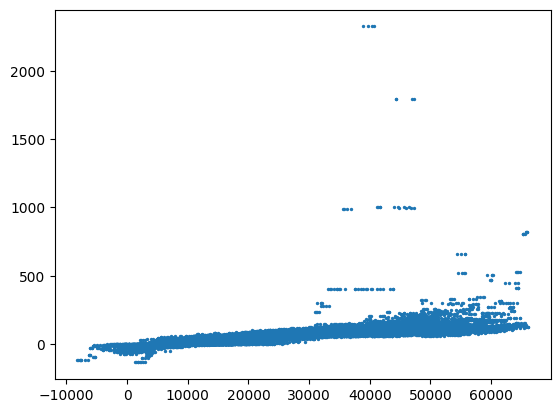

In [99]:
plt.scatter(data[['Residual load']], data[['Day Ahead Auction (DE-LU)']], s=2)
plt.show()

In [91]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(data[['Residual load']], data[['Day Ahead Auction (DE-LU)']])

# Make predictions
y_pred = model.predict(data[['Residual load']])

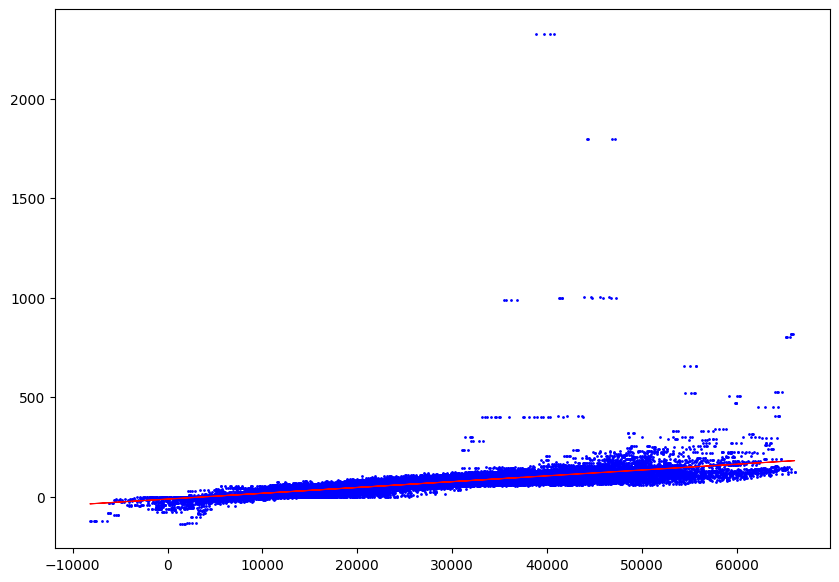

In [92]:
plt.figure(figsize=(10, 7))
plt.scatter(data[['Residual load']], data[['Day Ahead Auction (DE-LU)']], s=1, color='blue')
plt.plot(data[['Residual load']], y_pred, linewidth=0.8, color='red')
plt.show()

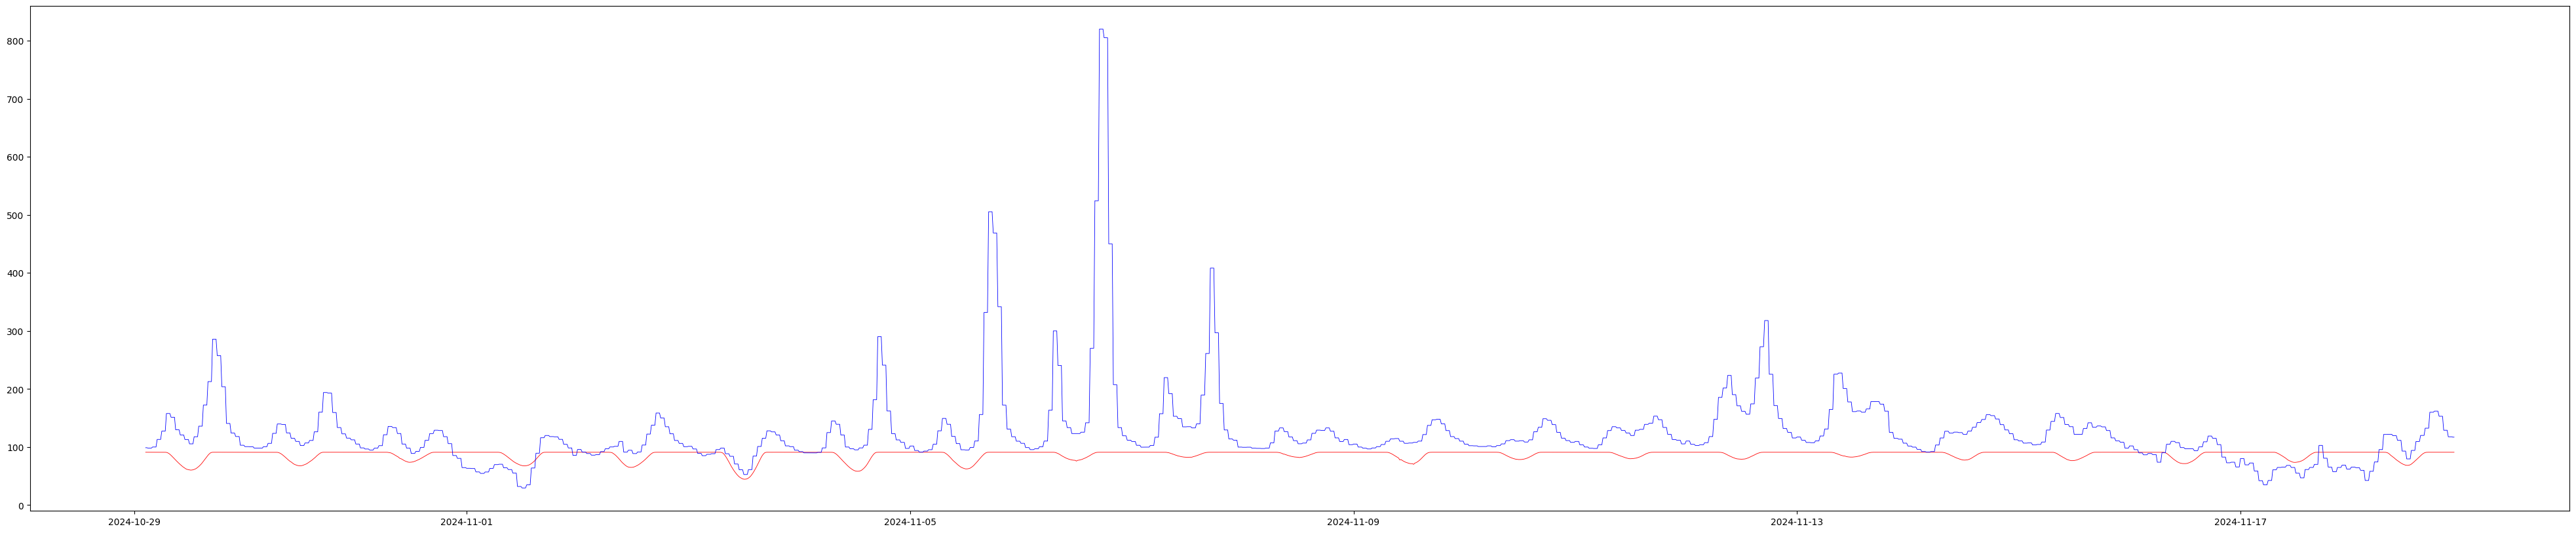

In [104]:
plt.figure(figsize=(50, 10))
plt.plot(data['Date (GMT+1)'][-2000:], y_pred[-2000:], color='red', linewidth=0.6)
plt.plot(data['Date (GMT+1)'][-2000:], data[['Day Ahead Auction (DE-LU)']][-2000:], color='blue', linewidth=0.6)


plt.show()

Mean Square Error (MSE)

In [106]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data[['Day Ahead Auction (DE-LU)']], y_pred)
mse

3267.2307425120907

### Lineárna regresia Residual Load

In [110]:
data = df[['Date (GMT+1)', 'Wind onshore', 'Day Ahead Auction (DE-LU)']]
# Null hodnoty treba vynechat
data = data.dropna()
data

,Date (GMT+1),Wind onshore,Day Ahead Auction (DE-LU)
0,2024-01-01 00:00:00,29367.0,0.10
1,2024-01-01 00:15:00,29028.0,0.10
2,2024-01-01 00:30:00,29035.8,0.10
3,2024-01-01 00:45:00,29440.9,0.10
4,2024-01-01 01:00:00,29501.6,0.01
...,...,...,...
30997,2024-11-18 21:15:00,17738.3,117.62
30998,2024-11-18 21:30:00,17501.0,117.62
30999,2024-11-18 21:45:00,17179.0,117.62
31000,2024-11-18 22:00:00,16866.0,116.99


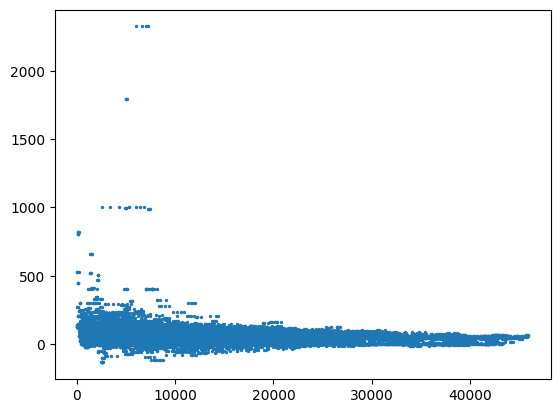

In [111]:
plt.scatter(data[['Wind onshore']], data[['Day Ahead Auction (DE-LU)']], s=2)
plt.show()

In [112]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(data[['Wind onshore']], data[['Day Ahead Auction (DE-LU)']])

# Make predictions
y_pred = model.predict(data[['Wind onshore']])

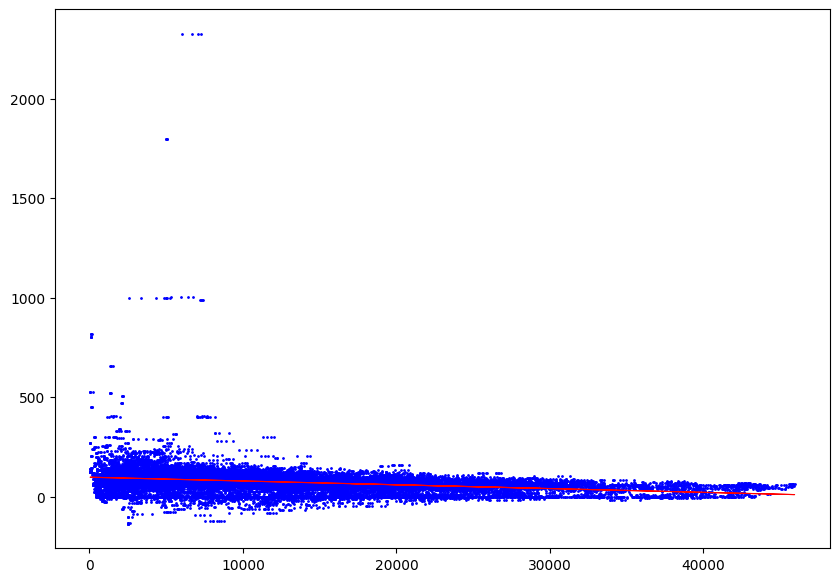

In [113]:
plt.figure(figsize=(10, 7))
plt.scatter(data[['Wind onshore']], data[['Day Ahead Auction (DE-LU)']], s=1, color='blue')
plt.plot(data[['Wind onshore']], y_pred, linewidth=0.8, color='red')
plt.show()

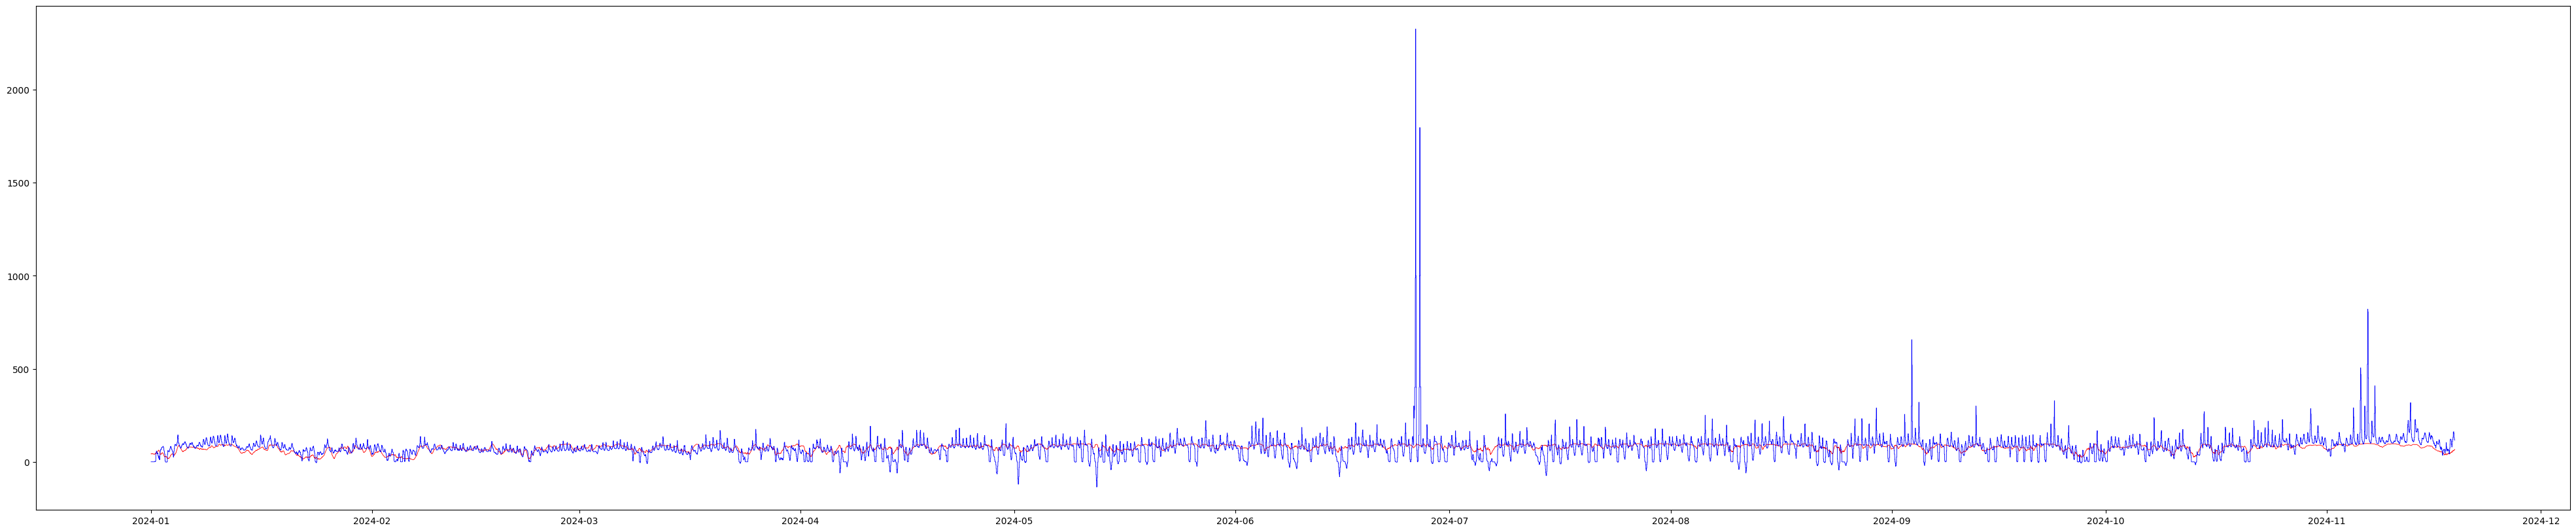

In [114]:
plt.figure(figsize=(50, 10))
plt.plot(data['Date (GMT+1)'], y_pred, color='red', linewidth=0.6)
plt.plot(data['Date (GMT+1)'], data[['Day Ahead Auction (DE-LU)']], color='blue', linewidth=0.6)


plt.show()

In [107]:
mse = mean_squared_error(data[['Day Ahead Auction (DE-LU)']], y_pred)
mse

3267.2307425120907